In [ ]:
import sys
sys.path.append("../analysis/")

In [2]:
import utils
import extraction

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
%matplotlib inline

In [5]:
raw_data = utils.fetch("2020-11-05-quals-talk-more-experiments-loads-only")

In [6]:
data = extraction.search_stats(raw_data)

In [7]:
type(data)

dict

In [8]:
import copy

In [9]:
preserved_data = copy.deepcopy(data)

In [10]:
import functools
def pessimal_reduce(lst):
    return functools.reduce(lambda acc, s: acc + s * acc, lst)

In [11]:
def search_goodness_stats(df):
    optimal = df['n_options'] * pd.concat([pd.Series([1]), df['in_solution'].iloc[:-1]]).reset_index(drop=True)
    actual = df['tested']
    pessimal = pessimal_reduce(df['n_options'][:-1].to_list())
    actual_count = actual[:-1].sum()
    optimal_count = optimal[:-1].sum()
    return {"actual": actual_count,
            "optimal": optimal_count,
            "pessimal": pessimal,
            "extraniousness": actual_count / optimal_count,
            "effectiveness": 1 - (actual_count / pessimal)}

In [12]:
accum = []
search_dat = extraction.search_info(raw_data)
for k, df in data.items():
    res = search_goodness_stats(df)
    res["spec"] = k
    res["success"] = search_dat['success'][k]
    accum.append(res)
pruning_df = pd.DataFrame(accum).set_index("spec")
pruning_df

,actual,optimal,pessimal,extraniousness,effectiveness,success
spec,,,,,,
l2/2d-stencil-7,4570,4510,73038420000,1.013304,1.000000,True
l2/2d-stencil-9,3366,3054,280500500000,1.102161,1.000000,True
l3/trove-crc-7,3534,3506,459280060672,1.007986,1.000000,True
l3/trove-crc-9,6965,6921,8110085308416,1.006357,1.000000,True
l3/2d-stencil-7,4598,4528,140026320000,1.015459,1.000000,True
...,...,...,...,...,...,...
l1/trove-cr_sum-4,23882,1,39958050,23882.000000,0.999402,False
l1/mult-32-with-4,456,241,5607014400,1.892116,1.000000,True
l3/trove-cr_sum-9,6135,6069,1624616448,1.010875,0.999996,True


In [13]:
successful = pruning_df[pruning_df['success']]

In [14]:
successful['extraniousness']

spec
l2/2d-stencil-7        1.013304
l2/2d-stencil-9        1.102161
l3/trove-crc-7         1.007986
l3/trove-crc-9         1.006357
l3/2d-stencil-7        1.015459
l3/2d-stencil-9        1.127119
l3/trove-rcr-9         2.388951
l3/trove-rcr-7         2.243167
l1/trove-crc-7         1.010340
l1/trove-rcr-7         2.411420
l2/2d-stencil-5        1.000000
l2/mult-64-with-16    28.264990
l2/1d-stencil          1.000000
l2/2d-stencil-3        1.000000
l2/1d-conv             1.929412
l2/mult-32-with-4      2.249307
l3/trove-rcr-2         1.103157
l3/1d-stencil          1.000000
l3/2d-stencil-5        1.000000
l3/trove-rcr-5         2.025730
l3/trove-crc-3         1.000000
l3/1d-conv             1.947510
l3/1d-conv-11          1.000000
l3/trove-crc-1         1.000000
l3/mult-64-with-16    27.595910
l3/trove-cr_sum-5      1.003383
l3/trove-cr_sum-7      1.009115
l3/1d-conv-5           1.000000
l3/1d-conv-9           1.000000
l3/2d-stencil-3        1.000000
l3/trove-rcr-3         1.899810
l3/

In [15]:
successful["effectiveness"].mean()

0.9960224210223388

In [16]:
successful["effectiveness"].argmin()

53

In [17]:
successful.iloc[53]

actual                  37
optimal                 37
pessimal               528
extraniousness           1
effectiveness     0.929924
success               True
Name: l1/trove-cr_sum-1, dtype: object

In [18]:
successful["pessimal"].median()

1964207232.0

In [19]:
successful.loc["l3/trove-rcr-4"].pessimal

24052440493224

In [20]:
np.log(successful.loc["l3/trove-rcr-4"].pessimal) / np.log(10)

13.381159148858174

In [21]:
len(successful[successful["extraniousness"] == 1]) / len(successful)

0.45

In [22]:
hvx_raw_data = utils.fetch("2020-11-05-hvx-benchmark-for-talk")

In [23]:
hvx_dat = extraction.search_stats(hvx_raw_data)['6-regs-hvx-conv-arith']

In [24]:
hvx_stats = search_goodness_stats(hvx_dat)
hvx_stats

{'actual': 116111,
 'optimal': 2264,
 'pessimal': 1458000000000000,
 'extraniousness': 51.28577738515901,
 'effectiveness': 0.9999999999203628}

In [25]:
successful['effectiveness']

spec
l2/2d-stencil-7       1.000000
l2/2d-stencil-9       1.000000
l3/trove-crc-7        1.000000
l3/trove-crc-9        1.000000
l3/2d-stencil-7       1.000000
l3/2d-stencil-9       1.000000
l3/trove-rcr-9        1.000000
l3/trove-rcr-7        1.000000
l1/trove-crc-7        1.000000
l1/trove-rcr-7        1.000000
l2/2d-stencil-5       0.999995
l2/mult-64-with-16    1.000000
l2/1d-stencil         0.999978
l2/2d-stencil-3       0.999992
l2/1d-conv            0.999997
l2/mult-32-with-4     1.000000
l3/trove-rcr-2        0.999999
l3/1d-stencil         0.999988
l3/2d-stencil-5       0.999997
l3/trove-rcr-5        1.000000
l3/trove-crc-3        0.999999
l3/1d-conv            0.999999
l3/1d-conv-11         0.999999
l3/trove-crc-1        0.982786
l3/mult-64-with-16    1.000000
l3/trove-cr_sum-5     0.999970
l3/trove-cr_sum-7     0.999989
l3/1d-conv-5          0.999999
l3/1d-conv-9          0.999999
l3/2d-stencil-3       0.999995
l3/trove-rcr-3        1.000000
l3/trove-cr_sum-3     0.999856
l3/

In [26]:
tbl_dat = successful.loc[['l3/2d-stencil-5', 'l3/2d-stencil-7',
                'l3/trove-crc-7', 'l3/trove-rcr-7',
                'l3/1d-conv', 'l3/mult-64-with-16']]
tbl_dat

,actual,optimal,pessimal,extraniousness,effectiveness,success
spec,,,,,,
l3/2d-stencil-5,113,113,44355600,1.000000,0.999997,True
l3/2d-stencil-7,4598,4528,140026320000,1.015459,1.000000,True
l3/trove-crc-7,3534,3506,459280060672,1.007986,1.000000,True
l3/trove-rcr-7,14363,6403,21928446214336,2.243167,1.000000,True
l3/1d-conv,2894,1486,1935490752,1.947510,0.999999,True
l3/mult-64-with-16,67472,2445,2629656730781802986392679040000000000000000,27.595910,1.000000,True


In [27]:
for r in tbl_dat.index:
    print(f"{r}: ({tbl_dat['actual'][r]}/10^{np.log(tbl_dat['pessimal'][r] * 1.0)/np.log(10):.1f})")

l3/2d-stencil-5: (113/10^7.6)
l3/2d-stencil-7: (4598/10^11.1)
l3/trove-crc-7: (3534/10^11.7)
l3/trove-rcr-7: (14363/10^13.3)
l3/1d-conv: (2894/10^9.3)
l3/mult-64-with-16: (67472/10^42.4)


In [28]:
for r in tbl_dat.index:
    print(f"{r}: {tbl_dat['pessimal'][r] * 1.0:.2}")

l3/2d-stencil-5: 4.4e+07
l3/2d-stencil-7: 1.4e+11
l3/trove-crc-7: 4.6e+11
l3/trove-rcr-7: 2.2e+13
l3/1d-conv: 1.9e+09
l3/mult-64-with-16: 2.6e+42


In [29]:
print(f"{hvx_stats['pessimal'] * 1.0:.2}")

1.5e+15


In [30]:
successful

,actual,optimal,pessimal,extraniousness,effectiveness,success
spec,,,,,,
l2/2d-stencil-7,4570,4510,73038420000,1.013304,1.000000,True
l2/2d-stencil-9,3366,3054,280500500000,1.102161,1.000000,True
l3/trove-crc-7,3534,3506,459280060672,1.007986,1.000000,True
l3/trove-crc-9,6965,6921,8110085308416,1.006357,1.000000,True
l3/2d-stencil-7,4598,4528,140026320000,1.015459,1.000000,True
l3/2d-stencil-9,3458,3068,621068499072,1.127119,1.000000,True
l3/trove-rcr-9,30096,12598,264360837651456,2.388951,1.000000,True
l3/trove-rcr-7,14363,6403,21928446214336,2.243167,1.000000,True
l1/trove-crc-7,2736,2708,186740307072,1.010340,1.000000,True


In [31]:
all_dat = pd.concat([successful, pd.DataFrame([hvx_stats], index=["HVX Gaussian"])])

In [32]:
all_dat.mean(axis=0)

actual            2.304659e+04
optimal           1.575641e+04
pessimal          5.462319e+40
extraniousness    3.184407e+00
effectiveness     9.960876e-01
success           1.000000e+00
dtype: float64

In [33]:
all_dat.median(axis=0)

actual            2.896000e+03
optimal           2.385000e+03
pessimal          1.967079e+09
extraniousness    1.004630e+00
effectiveness     9.999992e-01
success           1.000000e+00
dtype: float64

In [34]:
(successful["extraniousness"] == 1).mean()

0.45

In [35]:
1 - successful['actual'].sum() / successful['pessimal'].sum()

1.0

In [36]:
split = extraction.split_spec(successful.reset_index())
split['Problem'] = split['problem'].map(utils.PROBLEM_NAMES)
split = split[split['level'] == 3].copy()
split

,spec,actual,optimal,pessimal,extraniousness,effectiveness,success,level,problem,Problem
2,l3/trove-crc-7,3534,3506,459280060672,1.007986,1.000000,True,3,trove-crc-7,"Trove (CRC, s=7)"
3,l3/trove-crc-9,6965,6921,8110085308416,1.006357,1.000000,True,3,trove-crc-9,"Trove (CRC, s=9)"
4,l3/2d-stencil-7,4598,4528,140026320000,1.015459,1.000000,True,3,2d-stencil-7,2D stencil (k=7)
5,l3/2d-stencil-9,3458,3068,621068499072,1.127119,1.000000,True,3,2d-stencil-9,2D stencil (k=9)
6,l3/trove-rcr-9,30096,12598,264360837651456,2.388951,1.000000,True,3,trove-rcr-9,"Trove (RCR, s=9)"
7,l3/trove-rcr-7,14363,6403,21928446214336,2.243167,1.000000,True,3,trove-rcr-7,"Trove (RCR, s=7)"
16,l3/trove-rcr-2,413962,375252,387673630146,1.103157,0.999999,True,3,trove-rcr-2,"Trove (RCR, s=2)"
17,l3/1d-stencil,2926,2926,241936344,1.000000,0.999988,True,3,1d-stencil,1D stencil (k=3)
18,l3/2d-stencil-5,113,113,44355600,1.000000,0.999997,True,3,2d-stencil-5,2D stencil (k=5)
19,l3/trove-rcr-5,12282,6063,7860894104700,2.025730,1.000000,True,3,trove-rcr-5,"Trove (RCR, s=5)"


In [37]:
import re
def to_task_and_size(problem):
    match_trove = re.match(r'Trove \((\w+), s=(\d+)\)', problem)
    if match_trove is not None:
        return (f"Trove ({match_trove[1]})", int(match_trove[2]))
    match_ffm = re.match(r'FFM \(w=(\d+), registers\)', problem)
    if match_ffm is not None:
        return ("FFM (registers)", int(match_ffm[1]))
    match_2d_stencil = re.match(r'2D stencil \(k=(\d+)\)', problem)
    if match_2d_stencil is not None:
        return ("2D Stencil", int(match_2d_stencil[1]))
    match_1d_conv = re.match(r'1D convolution \(k=(\d+)\)', problem)
    if match_1d_conv is not None:
        return("1D Convolution", int(match_1d_conv[1]))
    return ("Misc", problem)

In [38]:
oracle_dat_full = split.set_index('Problem')[['extraniousness']].sort_index(inplace=False)
oracle_dat_full = oracle_dat_full.rename(columns={'extraniousness': 'Effectiveness factor'})
oracle_dat_full.index = oracle_dat_full.index.map(to_task_and_size).rename(['Task', 'Size'])
oracle_dat_full

Effectiveness factor
Task            Size                                  
1D Convolution  11                            1.000000
                13                            1.000000
                3                             1.947510
                5                             1.000000
                7                             1.000000
                9                             1.000000
Misc            1D stencil (k=3)              1.000000
2D Stencil      3                             1.000000
                5                             1.000000
                7                             1.015459
                9                             1.127119
FFM (registers) 4                             2.153453
                8                            27.595910
Trove (CRC)     1                             1.000000
                3                             1.000000
                5                             1.003159
                7                             1.007986
                9                             1.006357
Trove (RCR)     1                             1.000000
                2                             1.103157
                3                             1.899810
                4                             1.232402
                5                             2.025730
                7                             2.243167
                9                             2.388951
Trove (Sum)     1                             1.000000
                11                            1.025671
                13                            1.035500
                3                             1.000000
                5                             1.003383
                7                             1.009115
                9                             1.010875

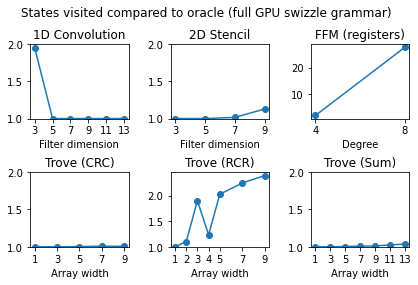

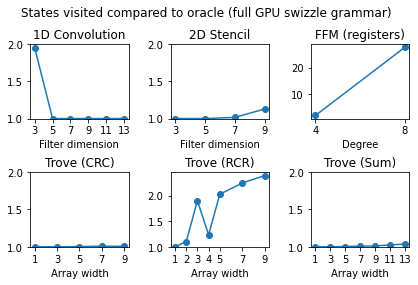

In [39]:
fig, axs = plt.subplots(2, 3)
seen_misc = False
for (idx, group) in enumerate(oracle_dat_full.reset_index().groupby('Task')):
    task, df = group
    if task == "Misc":
        seen_misc = True
        continue
    if seen_misc:
        idx = idx - 1
    ax = axs[idx // 3][idx % 3]
    df.set_index('Size').sort_index()['Effectiveness factor'].plot(kind='line', marker='o', ax=ax)
    ax.set_title(task)
    ax.set_ylim(bottom=1)
    if df['Effectiveness factor'].max() < 2:
        ax.set_ylim(top=2)
    ax.set_xticks(df.set_index('Size').sort_index().index.to_list())
    if task.startswith("Trove"):
        ax.set_xlabel("Array width")
    elif task.startswith("FFM"):
        ax.set_xlabel("Degree")
    elif task.startswith("2D") or task.startswith("1D"):
        ax.set_xlabel("Filter dimension")
    else:
        ax.set_xlabel("Problem")
fig.suptitle("States visited compared to oracle (full GPU swizzle grammar)")
fig.tight_layout()
fig.subplots_adjust(top=0.85)
fig.savefig("../results/2020-11-14-all-oracle-graphs.pdf")
fig